In [5]:
from scipy.optimize import minimize
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from scipy.optimize import fmin_cg
from scipy.optimize import least_squares

In [6]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [7]:
#Generation of experemental data
eps = 0.001
alpha = 0.62
beta = 0.37
x = np.array(range(1, 101)) / 100
delta = np.random.normal(size=100)
y = alpha * x + beta + delta

In [8]:
#import y from file
y = np.loadtxt('data_y.txt')

In [9]:
#Approximants definition 
def lin_fit(x, a, b):
    return a*x + b

def rat_fit(x, a, b):
    return a / (1 + b * x)

In [10]:
def D_lin(params):
    return mean_squared_error(lin_fit(x, *params), y)

In [11]:
#Gradient descent
def gradient(f, x, delta=eps/2):
        a, b = x[0], x[1]
        dx = (f([a+delta, b]) - f([a-delta, b])) / 2 / eps
        dy = (f([a, b+delta]) - f([a, b-delta])) / 2 / eps
        return np.array([dx, dy])

def grad_des_2d(func, x0=(0, 0), eps = 0.001, step = 0.1, args = None):
    n_func, n_iter = 0, 0
    
    if args:
        def f(x): return func(x, *args)
    else:
        def f(x): return func(x)
    
    x = x0
    while True:
        x_old = x
        x = x_old - step * gradient(f, x_old)
        n_func += 4
        n_iter += 1
        if np.linalg.norm(x-x_old) < eps:
            break
            
    print('Number of 𝑓-calculations:', n_func)
    print('Number of iterations:', n_iter)
    
    return x

        

In [12]:
a_lin_fit = np.zeros(4)
b_lin_fit = np.zeros(4)

In [13]:
#Gradient descent
a, b = grad_des_2d(D_lin, step = 0.5, eps= 0.00001, x0=(0.5, 0.5))
a_lin_fit[0], b_lin_fit[0] = a, b
a, b

Number of 𝑓-calculations: 800
Number of iterations: 200


(0.31152799249159435, 0.6196036975978088)

In [14]:
#Conjugate Gradient method
a, b = fmin_cg(D_lin, x0=(0.5, 0.5))
a_lin_fit[1], b_lin_fit[1] = a, b
a, b

Optimization terminated successfully.
         Current function value: 0.979221
         Iterations: 5
         Function evaluations: 40
         Gradient evaluations: 10


(0.3112742751025597, 0.6197409491673689)

In [15]:
#Newton's method
print(minimize(D_lin, x0=(0.5, 0.5), method='TNC', options = {'xatol': eps}))
a, b = minimize(D_lin, x0=(0.5, 0.5), method='TNC', options = {'xatol': eps}).x
a_lin_fit[2], b_lin_fit[2] = a, b
a, b

     fun: 0.9792209603801737
     jac: array([1.55431223e-07, 5.10702591e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 73
     nit: 11
  status: 0
 success: True
       x: array([0.31127504, 0.61974062])


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: OptimizeWarning: Unknown solver options: xatol
  


(0.31127504259430355, 0.619740616101996)

In [16]:
#Levenberg-Marquardt algorithm
print(least_squares(D_lin, x0=(0.5, 0.5), xtol=0.001))
a, b  = least_squares(D_lin, x0=(0.5, 0.5)).x
a_lin_fit[3], b_lin_fit[3] = a, b
a, b

 active_mask: array([0., 0.])
        cost: 0.47944519752576825
         fun: array([0.97922949])
        grad: array([ 0.00053133, -0.00200909])
         jac: array([[ 0.0005426, -0.0020517]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 34
        njev: 32
  optimality: 0.002009088702086806
      status: 3
     success: True
           x: array([0.32074881, 0.61393025])


(0.3117487258119626, 0.6195188868015266)

In [17]:
labels = [f"Gradient Descent: $y={round(a_lin_fit[0], 3)} \cdot x {round(b_lin_fit[0], 3):+}$", 
          f"Conjugate Gradient method: $y={round(a_lin_fit[1], 3)} \cdot x {round(b_lin_fit[1], 3):+}$",
         f"Newton's method: $y={round(a_lin_fit[2], 3)} \cdot x {round(b_lin_fit[2], 3):+}$",
         f"Levenberg-Marquardt algorithm: $y={round(a_lin_fit[3], 3)} \cdot x {round(b_lin_fit[3], 3):+}$"]

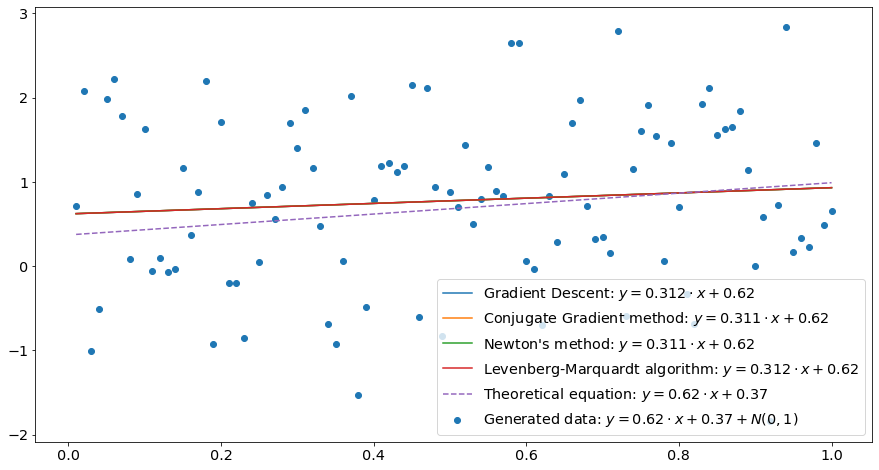

In [19]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, label=f"Generated data: $y={alpha} \cdot x +{beta} + N(0,1)$")
for a, b, label in zip(a_lin_fit, b_lin_fit, labels):
    plt.plot(x, lin_fit(x, a, b), label=label)
plt.plot(x, lin_fit(x, alpha, beta), linestyle='--', label=f"Theoretical equation: $y={alpha} \cdot x +{beta}$")

plt.legend()

In [21]:
#MSE for different methods
for i in range(4):
    print(D_lin([a_lin_fit[i], b_lin_fit[i]]))

0.9792209657677405
0.9792209603802697
0.9792209603801737
0.9792209793465908


Rational approximation:

In [22]:
a_rat_fit = np.zeros(4)
b_rat_fit = np.zeros(4)

In [23]:
def D_rat(params):
    return mean_squared_error(rat_fit(x, *params), y)

In [24]:
#Gradient descent
a, b = grad_des_2d(D_rat, step = 0.5, eps= 0.0001, x0=(0.5, 0.5))
a_rat_fit[0], b_rat_fit[0] = a, b
a, b

Number of 𝑓-calculations: 624
Number of iterations: 156


(0.6507300676375778, -0.3046845354814369)

In [25]:
#Conjugate Gradient method
a, b = fmin_cg(D_rat, x0=(0.5, 0.5), epsilon=0.001)
a_rat_fit[1], b_rat_fit[1] = a, b
a, b

         Current function value: 0.979764
         Iterations: 9
         Function evaluations: 348
         Gradient evaluations: 84


(0.6470551541422809, -0.3115069041186866)

In [26]:
#Newton's method
print(minimize(D_rat, x0=(0, 1), method='TNC', options = {'xatol': eps}))
a, b = minimize(D_rat, x0=(0, 1), method='TNC', options = {'xatol': eps}).x
a_rat_fit[2], b_rat_fit[2] = a, b
a, b

     fun: 0.9797605683904159
     jac: array([1.10134124e-05, 5.42899059e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 56
     nit: 10
  status: 1
 success: True
       x: array([ 0.64988892, -0.30634749])


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xatol
  """Entry point for launching an IPython kernel.
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: OptimizeWarning: Unknown solver options: xatol
  


(0.649888916548914, -0.30634748714572346)

In [27]:
#Levenberg-Marquardt algorithm
print(least_squares(D_rat, x0=(0.5, 0.5)))
a, b  = least_squares(D_rat, x0=(0.5, 0.5)).x
a_rat_fit[3], b_rat_fit[3] = a, b
a, b

 active_mask: array([0., 0.])
        cost: 0.4799654038864063
         fun: array([0.97976059])
        grad: array([-7.61513594e-05,  1.26935965e-04])
         jac: array([[-7.77244568e-05,  1.29558146e-04]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 79
        njev: 79
  optimality: 0.00012693596517115334
      status: 2
     success: True
           x: array([ 0.65001897, -0.30600795])


(0.6500189705895973, -0.30600794668795867)

In [28]:
labels = [f"Gradient Descent: $y={round(a_rat_fit[0], 3)} / (1{round(b_rat_fit[0], 3):+} \cdot x)$", 
          f"Conjugate Gradient Descent: $y={round(a_rat_fit[1], 3)} / (1{round(b_rat_fit[1], 3):+} \cdot x)$",
         f"Newton's method: $y={round(a_rat_fit[2], 3)} / (1{round(b_rat_fit[2], 3):+} \cdot x)$",
         f"Levenberg-Marquardt algorithm: $y={round(a_rat_fit[3], 3)} / (1{round(b_rat_fit[3], 3):+} \cdot x)$"]

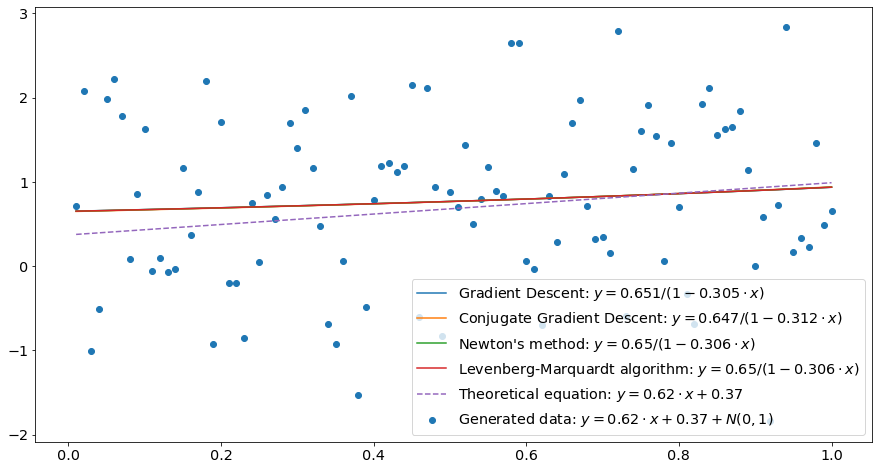

In [29]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, label=f"Generated data: $y={alpha} \cdot x +{beta} + N(0,1)$")
for a, b, label in zip(a_rat_fit, b_rat_fit, labels):
    plt.plot(x, rat_fit(x, a, b), label=label)
plt.plot(x, lin_fit(x, alpha, beta), linestyle='--', label=f"Theoretical equation: $y={alpha} \cdot x +{beta}$")

plt.legend()

In [31]:
#MSE for different methods
for i in range(4):
    print(D_rat([a_rat_fit[i], b_rat_fit[i]]))

0.9797609248903314
0.9797639743271787
0.9797605683904159
0.9797605869664346
